In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [3]:
df = pd.read_csv("E:\\Downloads\\gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
df.GLD.describe()

count    2290.000000
mean      122.732875
std        23.283346
min        70.000000
25%       109.725000
50%       120.580002
75%       132.840004
max       184.589996
Name: GLD, dtype: float64

In [10]:
correlation = df.corr()

<AxesSubplot:>

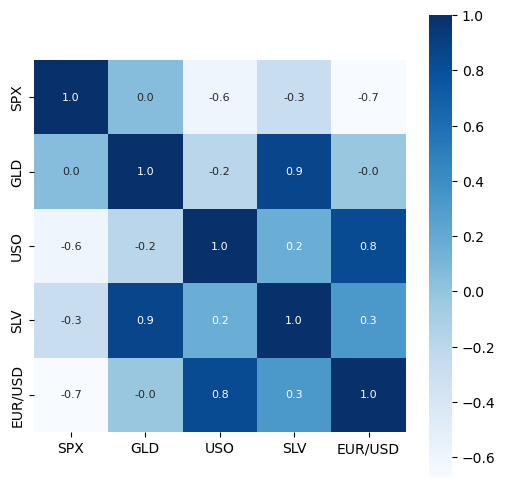

In [11]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar = True, square = True, fmt='.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [12]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


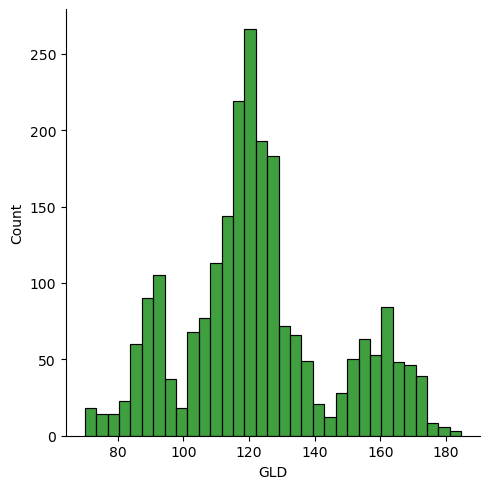

In [13]:
#checking the distribution of GLD price
sns.displot(df.GLD, color = 'green')

In [14]:
#Splitting features and the target
X = df.drop(['Date', 'GLD'], axis=1)
Y = df.GLD

In [15]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [16]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [17]:
#Splitiing the X AND Y data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2) 

In [18]:
#Model training :: Random Forest Regressor
regressor = RandomForestRegressor(n_estimators = 100)

In [19]:
#Fitting the training data in regressor
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [36]:
test_data_prediction = regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[168.63169969  81.96829977 116.12729984 127.66200073 120.57200116
 154.64509792 150.47139856 126.2169004  117.57969866 125.98910079
 116.62910079 171.7915007  141.37889896 167.69679839 115.20699995
 117.97650071 139.03750288 169.94090068 159.52390343 162.206699
 155.18720054 125.41560025 175.94549937 157.64900423 125.24140042
  93.96959978  77.52280015 120.41859999 119.09979949 167.52119948
  88.21640062 125.29650041  91.12490062 117.62400039 121.11729903
 135.82230095 115.75460123 114.93950084 148.06709948 107.21620085
 104.34520254  87.10869786 126.34030088 118.09080015 154.47909882
 119.39550028 108.61889927 108.17029841  93.27790077 127.21569763
  74.97000039 113.70949938 121.33200007 111.22199881 118.88429885
 120.46269958 158.55330053 166.78990158 147.00889709  86.05959869
  94.52350026  86.81879819  90.54580021 119.04360078 126.46320049
 127.43320021 169.03859963 122.25309896 117.38329899  98.6187002
 167.38690025 143.12119828 132.01500177 121.18910202 121.3595997
 119.64880078 

In [31]:
# R squared error -> Gives the difference between the real values and the predicted values->> Called error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9892546479051071


In [32]:
#If not done this then graph becomes very dirty
Y_test = list(Y_test)

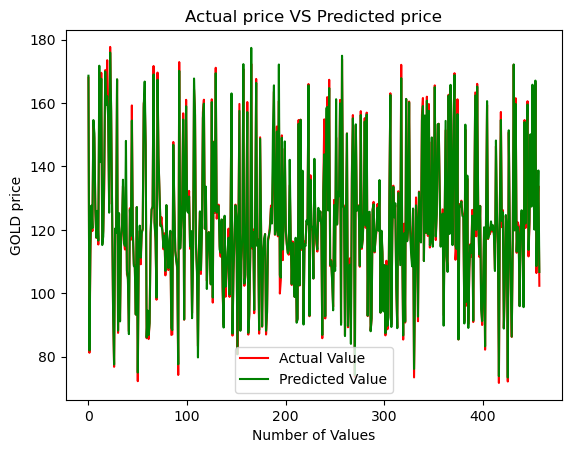

In [33]:
plt.plot(Y_test, color = 'red', label='Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual price VS Predicted price')
plt.xlabel('Number of Values')
plt.ylabel('GOLD price')
plt.legend()
plt.show()

In [37]:
regressor.predict([[1447.160034, 78.470001, 15.180, 1.471692]])

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([84.9920999])